In [ ]:
!pip install tensorflow opencv-python matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Place your kaggle.json in ~/.kaggle or the project root
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install and download dataset
!pip install kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip -d face-mask-dataset


Streaming output truncated to the last 5000 lines.
  inflating: face-mask-dataset/data/with_mask/with_mask_3297.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3298.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3299.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_33.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_330.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3300.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3301.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3302.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3303.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3304.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3305.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3306.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3307.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3308.jpg  
  inflating: f

In [6]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [7]:
data = []
labels = []
base_dir = 'face-mask-dataset/data'
classes = ['with_mask', 'without_mask']

for label in classes:
    path = os.path.join(base_dir, label)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.resize(image, (299, 299))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(0 if label == "with_mask" else 1)

data = np.array(data, dtype="float32")
labels = to_categorical(np.array(labels))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)



In [8]:
#Model 1 : Inception
base_model = InceptionV3(include_top=False, input_shape=(299, 299, 3), weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(2, activation="softmax")(x)
models = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

models.compile(optimizer=Adam(learning_rate=1e-4), loss="categorical_crossentropy", metrics=["accuracy"])


In [4]:
history = models.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 1329s 7s/step - accuracy: 0.9221 - loss: 0.2155 - val_accuracy: 0.9808 - val_loss: 0.0541
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 1314s 7s/step - accuracy: 0.9893 - loss: 0.0369 - val_accuracy: 0.9848 - val_loss: 0.0400
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 1333s 7s/step - accuracy: 0.9933 - loss: 0.0272 - val_accuracy: 0.9861 - val_loss: 0.0335
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 1335s 7s/step - accuracy: 0.9948 - loss: 0.0201 - val_accuracy: 0.9927 - val_loss: 0.0261
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 1316s 7s/step - accuracy: 0.9956 - loss: 0.0169 - val_accuracy: 0.9861 - val_loss: 0.0289


48/48 ━━━━━━━━━━━━━━━━━━━━ 276s 6s/step
accuracy by manual method: 98.61 %

48/48 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.9877 - loss: 0.0264
accuracy by tf : 98.61019253730774 % 

48/48 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.9877 - loss: 0.0264
loss by tf : 2.8899066150188446 % 

classification report :               precision    recall  f1-score   support

   with_mask       0.99      0.98      0.99       745
without_mask       0.98      0.99      0.99       766

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



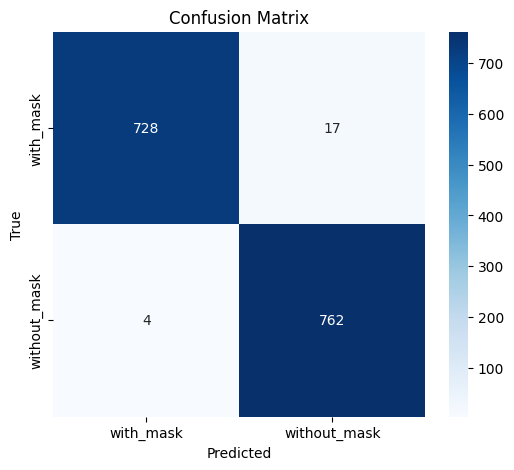

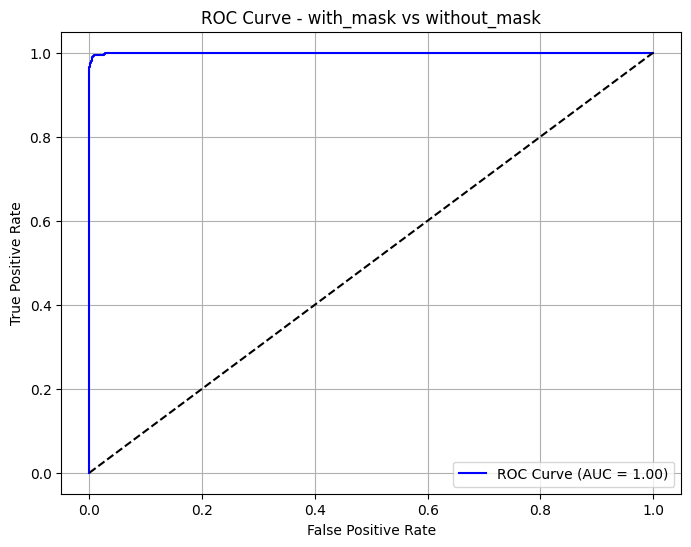

In [5]:
y_pred = models.predict(x_test)
y_pred1 = (y_pred > 0.5).astype("int32")
y_test_labels = np.argmax(y_test, axis=1)

acc = np.mean(y_pred1[:,1] == y_test_labels)
print(f"accuracy by manual method: {acc * 100:.2f} %\n")
print(f"accuracy by tf : {models.evaluate(x_test,y_test)[1]*100} % \n")
print(f"loss by tf : {models.evaluate(x_test,y_test)[0]*100} % \n")

print(f"classification report : {classification_report(y_test_labels, y_pred1[:,1], target_names=classes)}")


cm = confusion_matrix(y_test_labels, y_pred1[:,1])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

fpr, tpr, _ = roc_curve(y_test_labels, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - with_mask vs without_mask')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


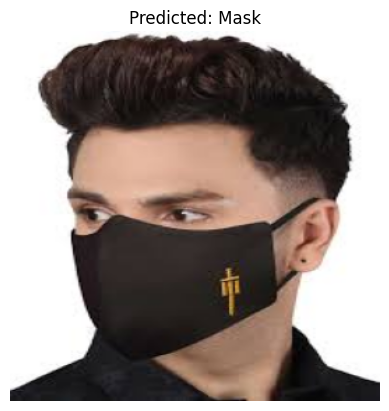

In [10]:
def predict_mask(img_path):
  image = cv2.imread(img_path)
  if image is None:
        raise ValueError(f"Cannot load image from path: {img_path}")
  image = cv2.resize(image, (299, 299))
  img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = img_to_array(image)
  image = preprocess_input(image)
  image = np.expand_dims(image, axis=0)
  (mask, no_mask) = models.predict(image)[0]
  plt.imshow(img_rgb)
  plt.title(f"Predicted: {'Mask' if mask > no_mask else 'No Mask'}")
  plt.axis('off')
  plt.show()

predict_mask('/content/download.jpg')